# Training a Student Performance Decision Tree Regression Model from Scratch.

## Dependencies
- pandas - To work with solid data-structures, n-dimensional matrices and perform exploratory data analysis.
- matplotlib - To visualize data using 2D plots.
- seaborn - To make 2D plots look pretty and readable.
- scikit-learn - To split data, encoding categorical to numerical values.
- numpy - To work with arrays.

## Development Steps
1. **Data collection:** Our Dataset 'StudentPerformanceFactors.csv' gathered from Kaggle is labeled data which will be used for supervised learning (classification problem). 

2. **Data exploration:** We describe, visualise, and analyse the data to understand its structure, types of values, and any inconsistencies or outliers.

3. **Data preparation:** Resolve data quality issues and transform the data to make it suitable for the machine learning approach, including normalising and reducing the data and the problem you are solving.

4. **Modelling:** Building and applying the appropriate ML algorithms based on the data and the problem we are solving.

5. **Evaluating:** Assesing how well the chosen model performs, making adjustments as necessary to improve its accuracy and effectiveness.

6. **Actionable insight:** Identifying potential actions based on the model’s results, such as deploying the model to production or deciding on further steps based on the patterns identified.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

In [3]:
file_path = ('StudentPerformanceFactors.csv')

data = pd.read_csv(file_path)

# 1. Data Understanding

In [4]:
print('\nFirst 5 rows of the dataset')

data.head()


First 5 rows of the dataset


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
print("\nData Information:")

data.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6

In [6]:
print('\nMissing Values:')
data.isnull().sum()


Missing Values:


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
print('\nStatistical Summary:')
data.describe()


Statistical Summary:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# 2. Data Preprocessing and Exploratory Data Analysis (EDA)
### Goals
1.  Handle missing values.
2.	Visualize data distributions for numerical features.
3.	Analyze categorical features.
4.	Investigate relationships between features and the target variable, Exam_Score.

#### 2.1 Handling missing values
Filling missing values with mode for categorical and median for numerical

In [8]:
data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0], inplace = True)
data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0], inplace = True)
data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0], inplace=True)
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

#### 2.2 Visualizing distributions of numerical features

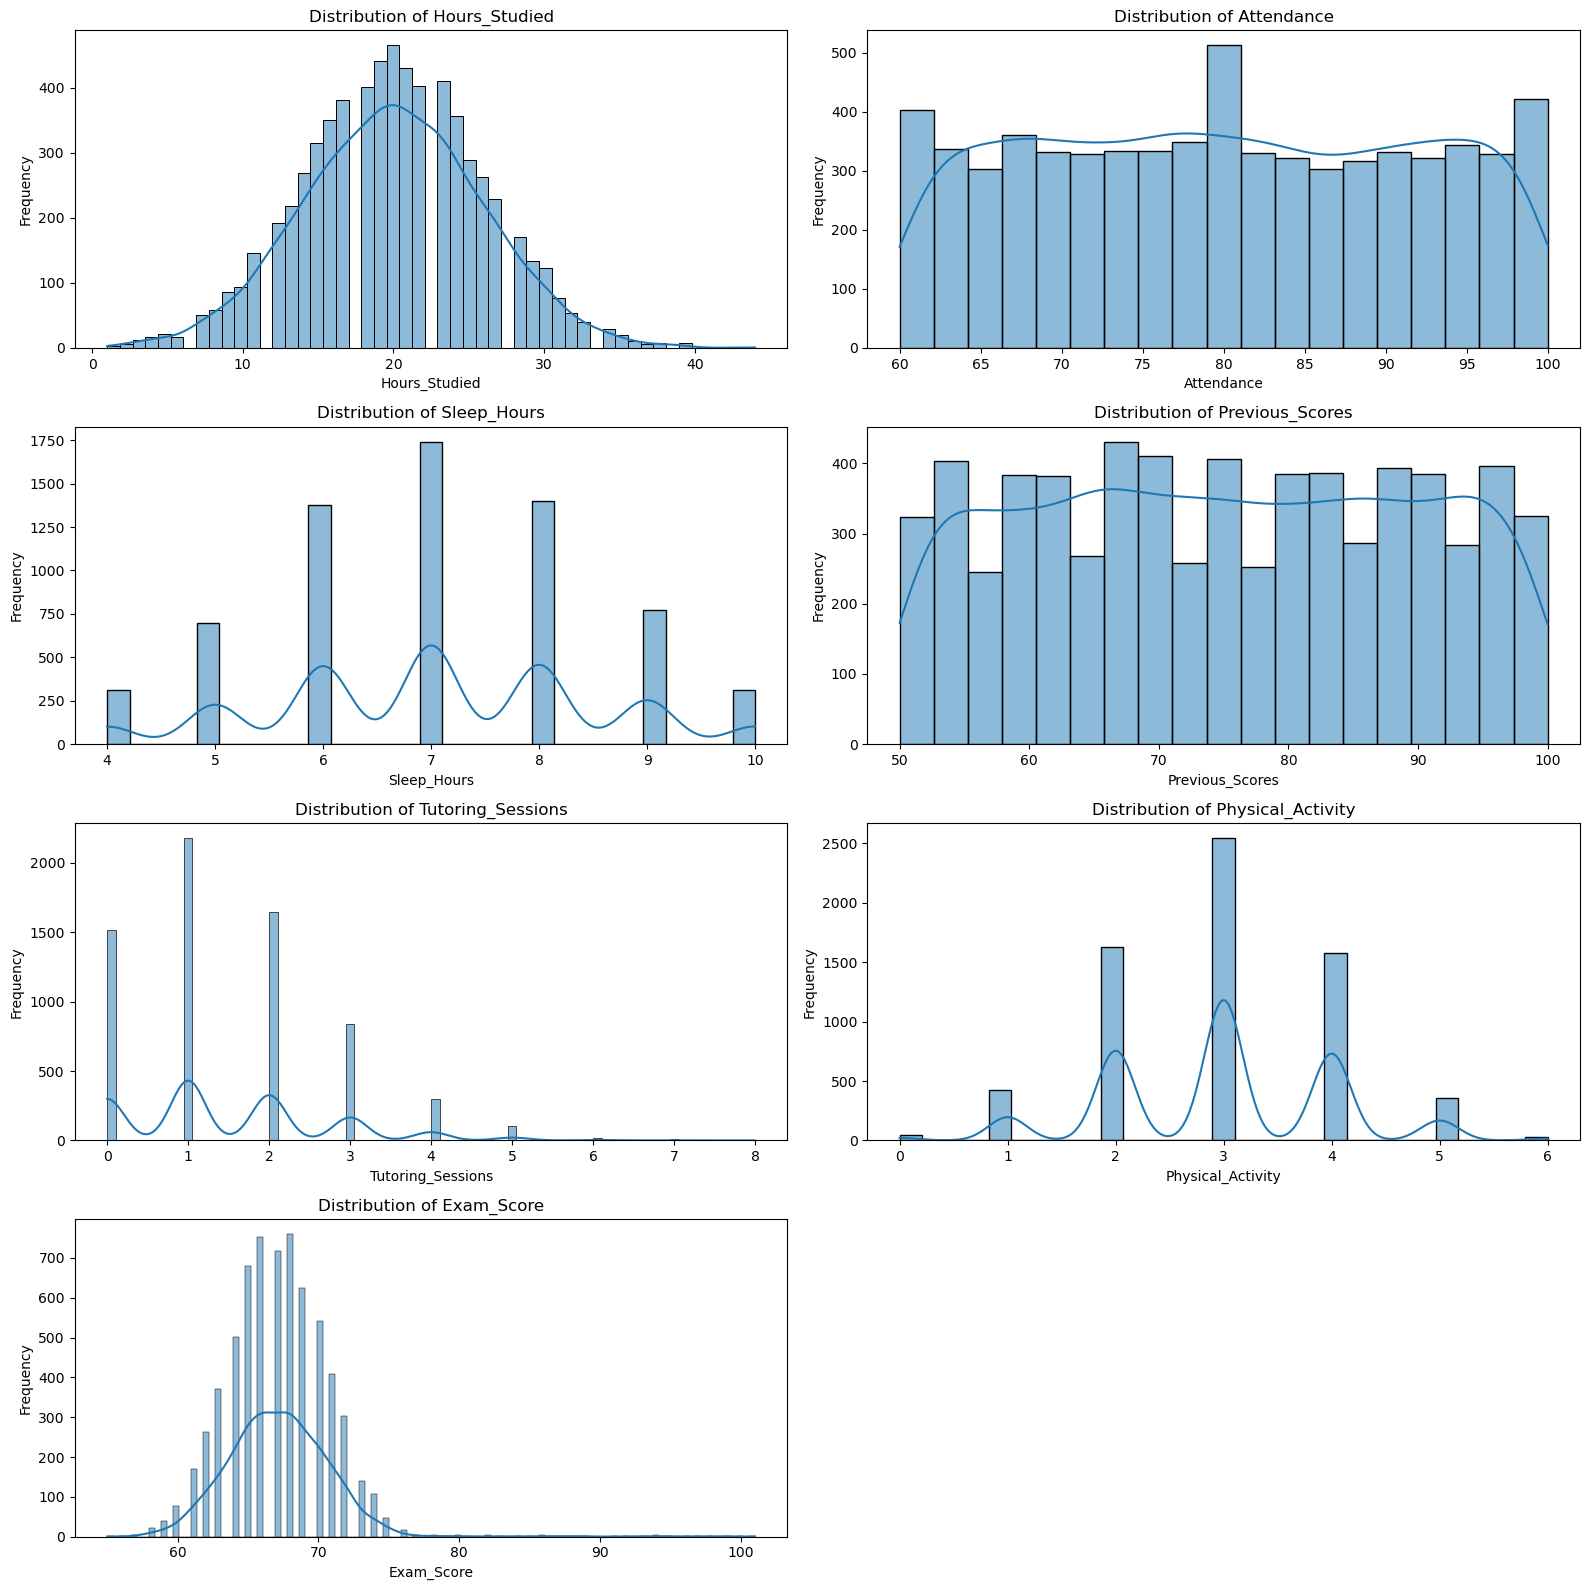

In [9]:

# Create a grid of histograms for numerical columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))
axes = axes.flatten()

for i, column in enumerate(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                            'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']):
    sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### 2.2.1 Understanding distributions of numerical features
**Hours Studied** distribution is uniform but skewed toward lower hours studied. most students study between 10 and 30 hours per week. 

**Attendence** rates are slightly skewed toward higher values, indicating that most students have a fairly high attendance.



#### 2.3 Visualizing distributions of categorical features

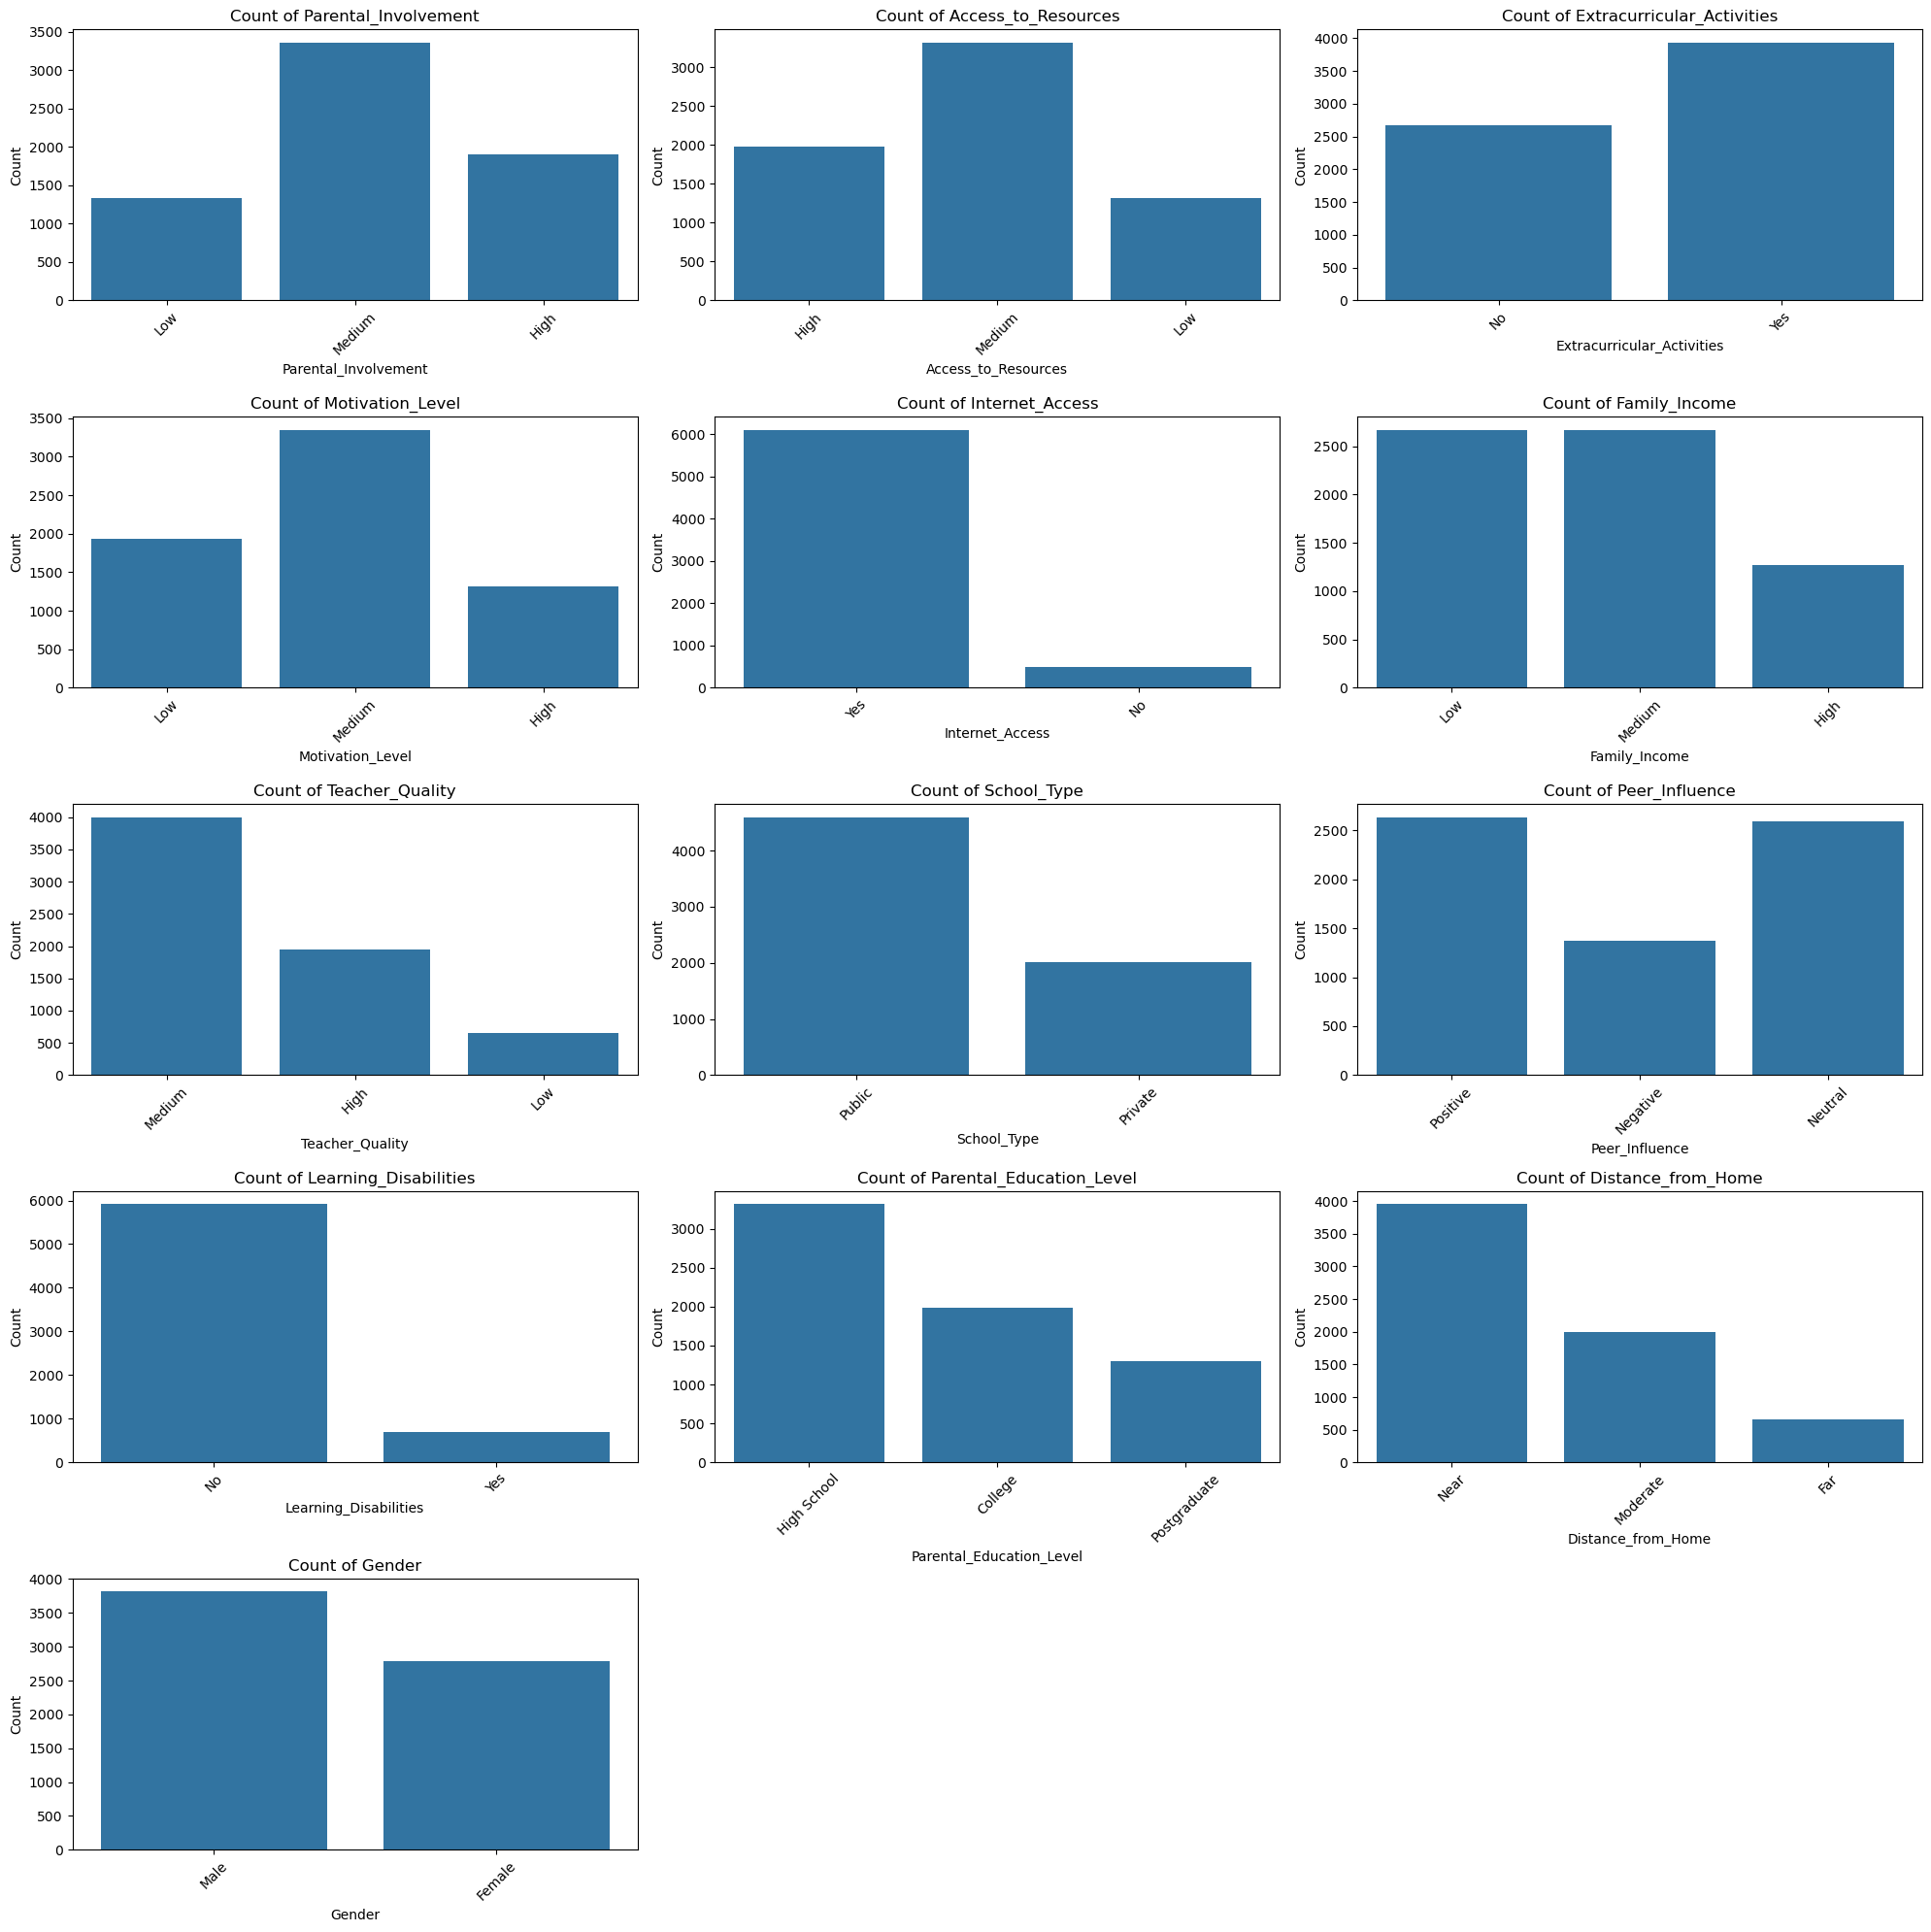

In [10]:
# Create a grid of count plots for categorical columns
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                            'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
                            'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
                            'Parental_Education_Level', 'Distance_from_Home', 'Gender']):
    sns.countplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f'Count of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

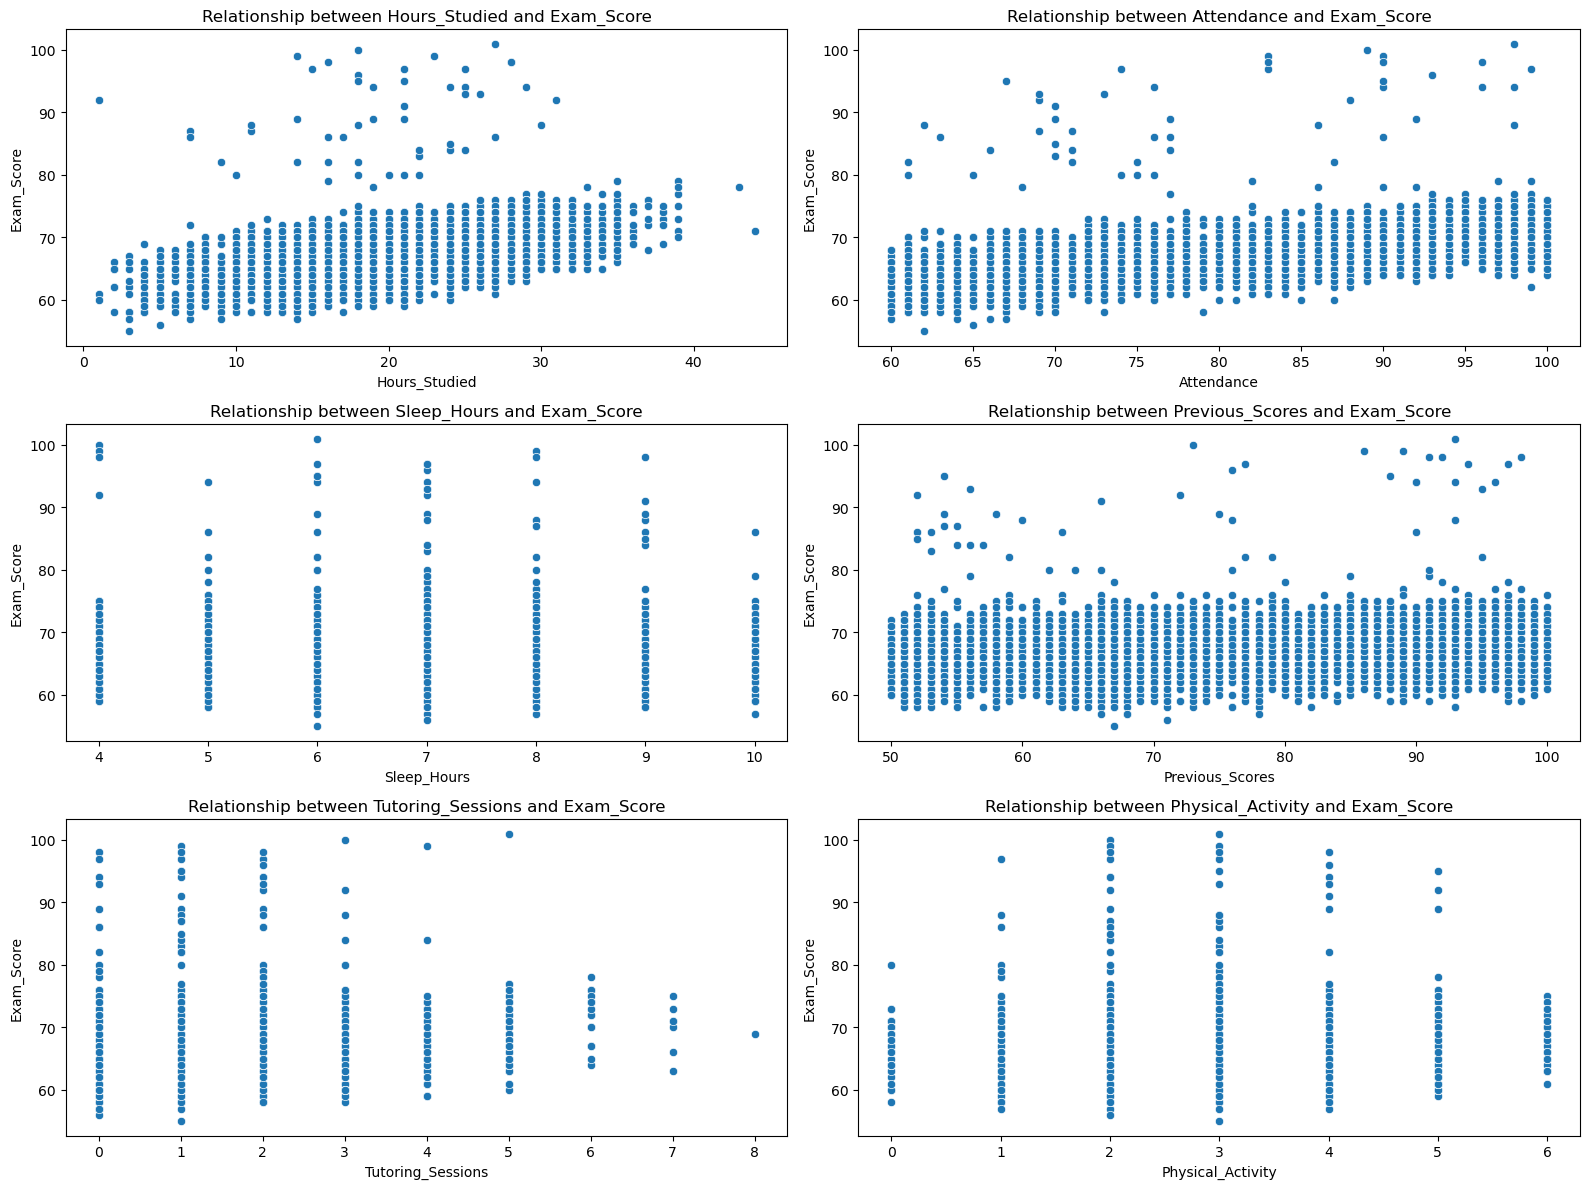

In [11]:
# Create a grid of scatter plots for numerical features vs. Exam_Score
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for i, column in enumerate(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                            'Tutoring_Sessions', 'Physical_Activity']):
    sns.scatterplot(x=data[column], y=data['Exam_Score'], ax=axes[i])
    axes[i].set_title(f'Relationship between {column} and Exam_Score')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Exam_Score')

# Adjust layout
plt.tight_layout()
plt.show()

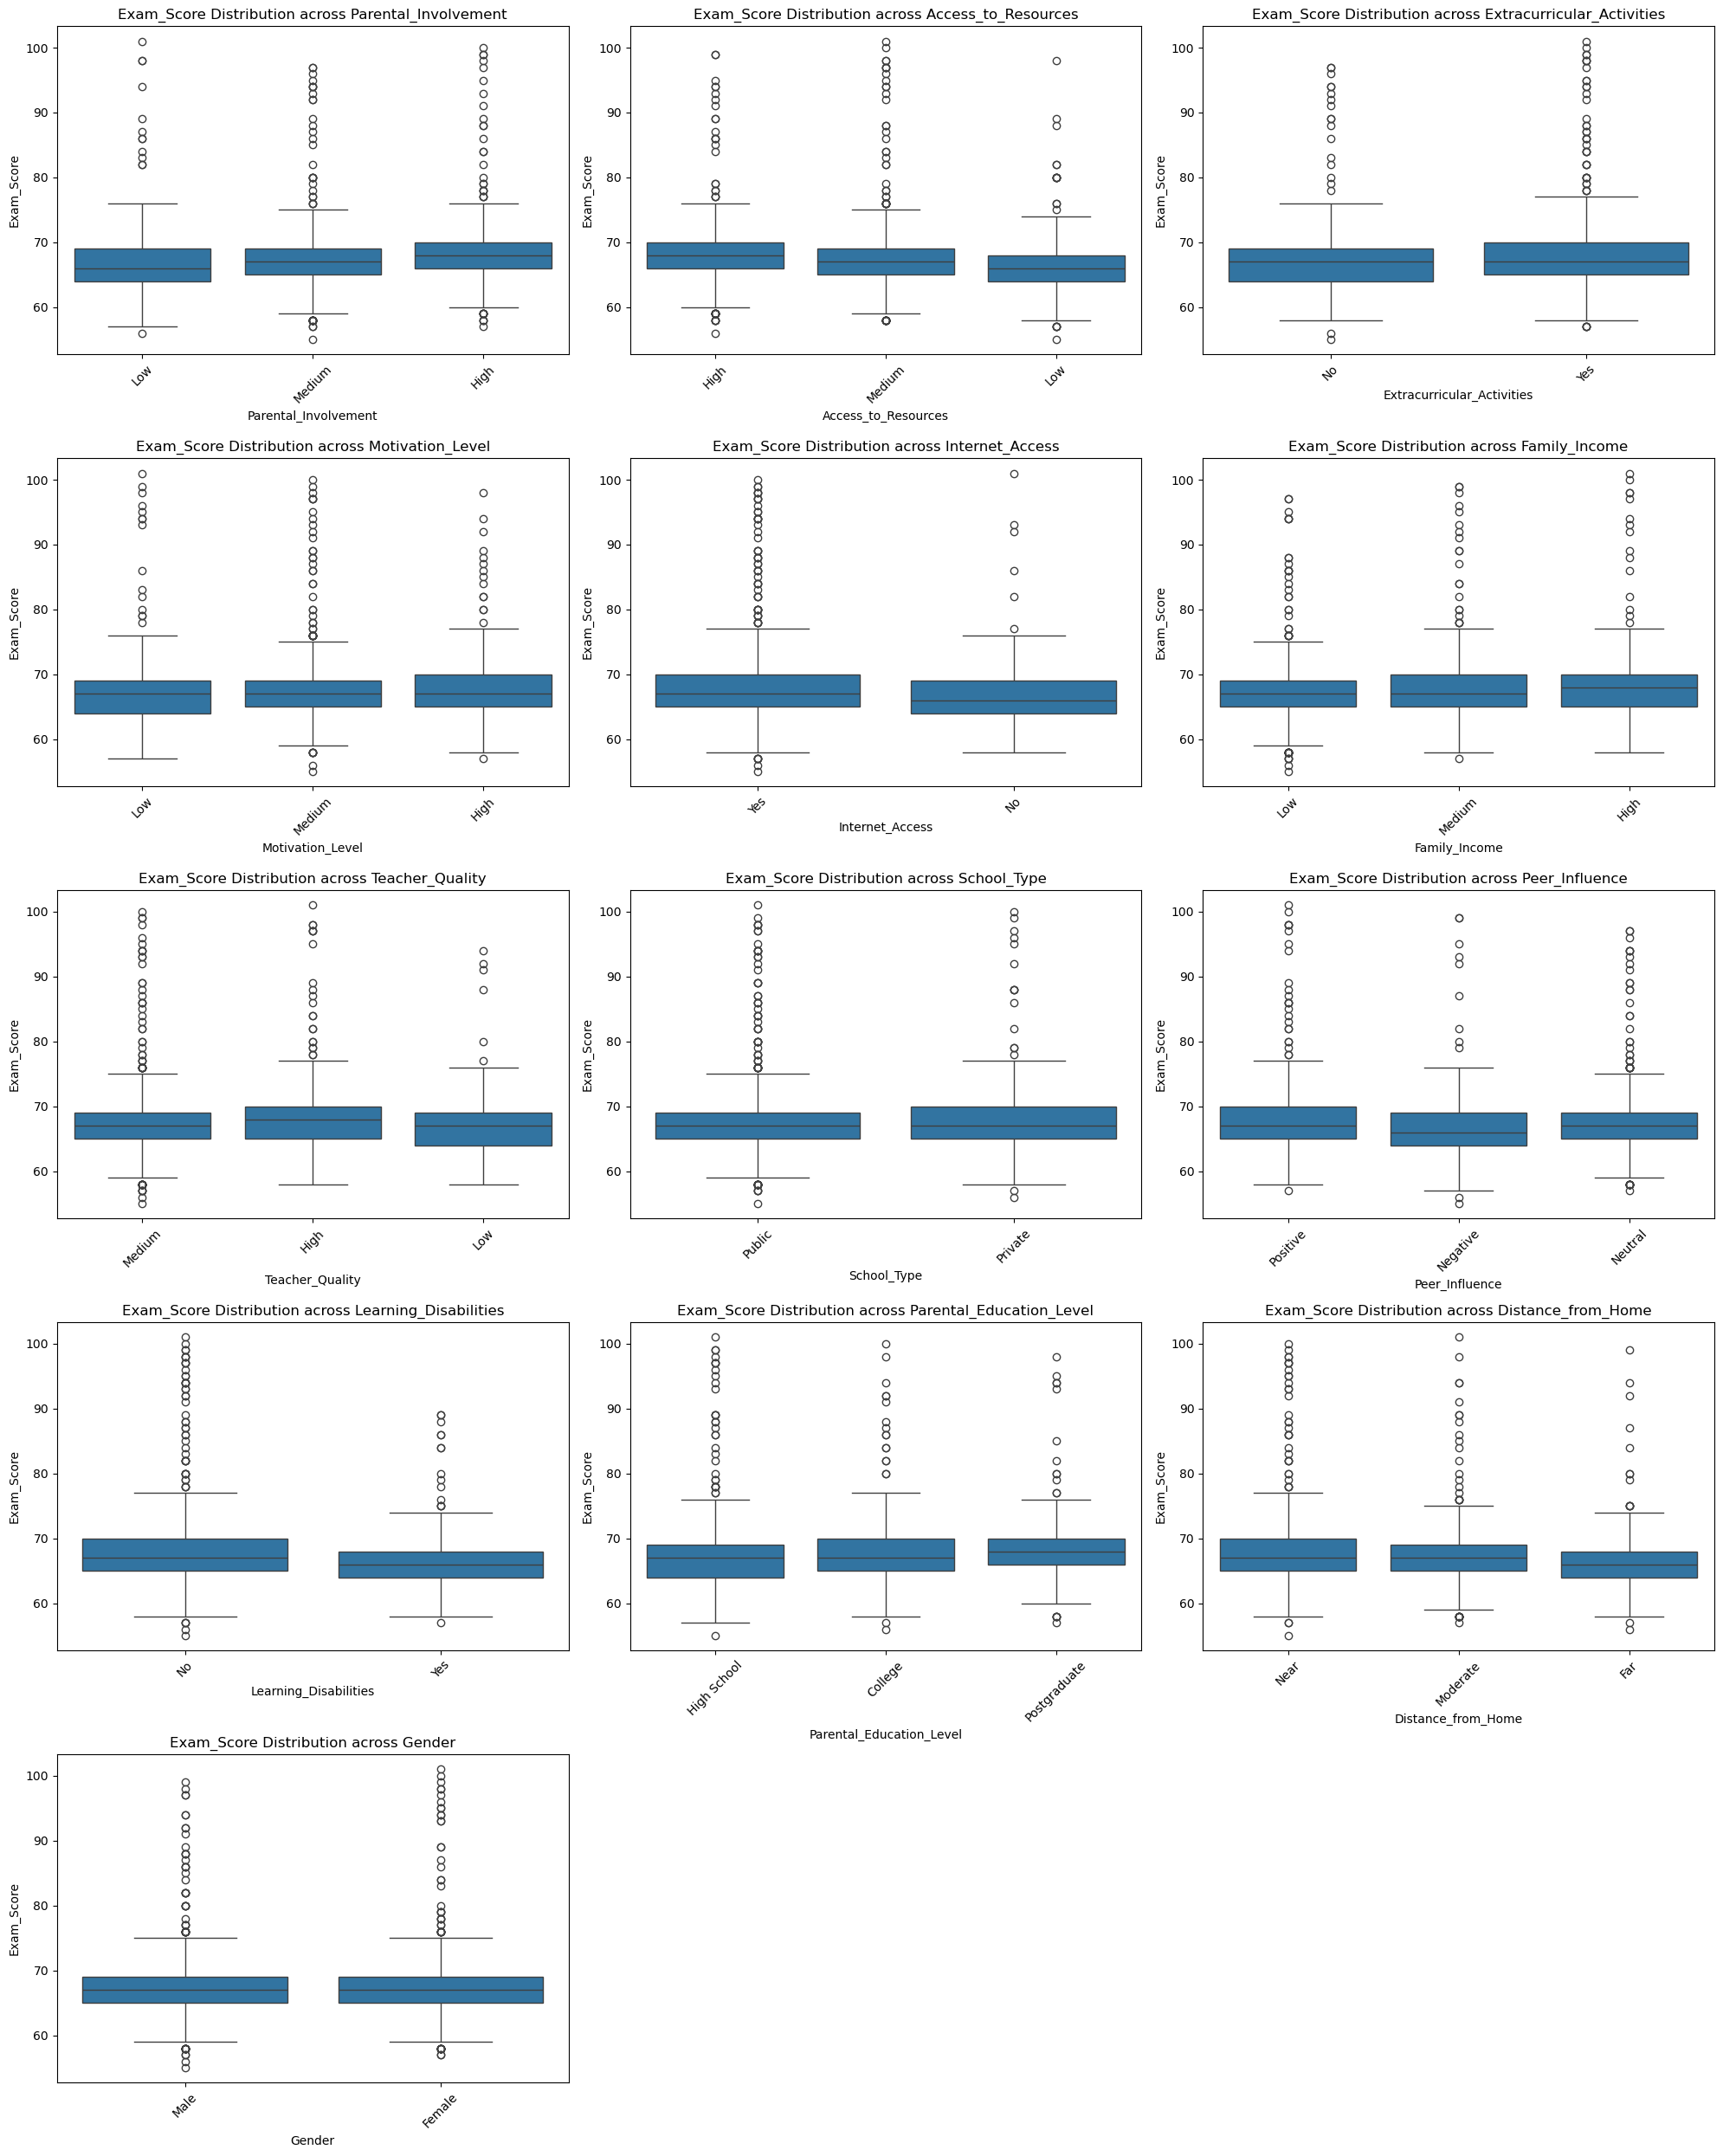

In [12]:
# Create a grid of box plots for categorical features vs. Exam_Score
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 25))
axes = axes.flatten()

for i, column in enumerate(['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                            'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
                            'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
                            'Parental_Education_Level', 'Distance_from_Home', 'Gender']):
    sns.boxplot(x=data[column], y=data['Exam_Score'], ax=axes[i])
    axes[i].set_title(f'Exam_Score Distribution across {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Exam_Score')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Key insights 
1. Positive Correlations: Hours_Studied and Attendance seem to have a positive impact on Exam_Score.

2. Categorical Influences: Certain categorical variables, such as School_Type and Motivation_Level, also show differences in exam scores.
	
3. Potential Outliers: The Exam_Score of 101 is likely an outlier that needs further investigation.

## 3. Feature Selection and Engineering
### Goals
1. **Outlier Detection and Handling:** We should investigate and potentially remove or cap extreme values like the Exam_Score of 101.

2. **Feature Engineering:** We may create new features if necessary or transform existing ones to improve our model.

3. **Model Preparation:** Once we finalize our features, we can start thinking about building our predictive model.

### 3.1 Outliers

In [13]:
# Step 1: Identify outliers using the IQR method
def detect_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Check for outliers in 'Exam_Score'
exam_score_outliers = detect_outliers('Exam_Score')
print("Outliers in Exam_Score:")
exam_score_outliers

Outliers in Exam_Score:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
106,31,100,Medium,Medium,No,7,59,Medium,Yes,2,High,High,Public,Positive,5,No,Postgraduate,Moderate,Male,76
113,35,99,High,High,Yes,7,85,Low,Yes,2,Medium,High,Private,Neutral,2,No,Postgraduate,Near,Female,79
209,43,86,High,Medium,Yes,7,97,Medium,Yes,2,Medium,High,Public,Positive,1,No,High School,Near,Female,78
217,19,70,Medium,Low,No,7,54,High,Yes,0,Medium,Medium,Public,Positive,2,Yes,High School,Moderate,Male,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6347,28,96,High,Low,Yes,4,98,High,Yes,1,High,High,Public,Positive,3,No,High School,Near,Male,98
6393,16,83,Low,Medium,Yes,8,92,Low,Yes,2,High,High,Public,Positive,4,No,Postgraduate,Near,Female,98
6431,4,60,Medium,Medium,Yes,7,55,Medium,Yes,2,Low,Medium,Private,Neutral,2,No,Postgraduate,Near,Male,58
6522,18,90,High,High,Yes,6,54,Low,Yes,1,Medium,High,Public,Negative,3,No,High School,Near,Female,95


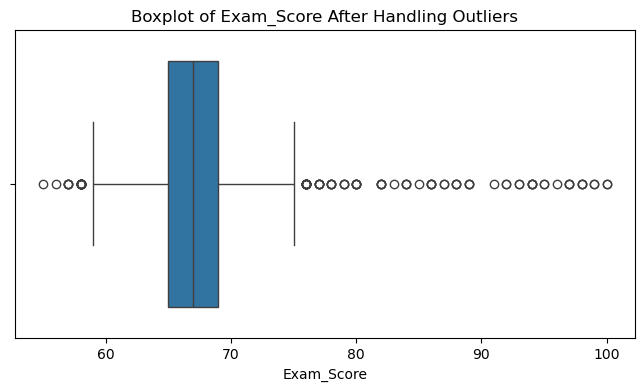

Outlier handling complete. Ready for feature engineering and model building!


In [14]:
# Step 2: Handle outliers
# For 'Exam_Score', we'll cap the maximum value to 100 if necessary
data['Exam_Score'] = data['Exam_Score'].apply(lambda x: 100 if x > 100 else x)

# Verify that the outlier has been handled
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Exam_Score'])
plt.title("Boxplot of Exam_Score After Handling Outliers")
plt.show()

# Step 3: Feature Engineering (if needed)
# We can create new features or transform existing ones. For now, let's consider interactions or normalizations if needed.

print("Outlier handling complete. Ready for feature engineering and model building!")


### 3.2 Feature Engineering

In [15]:
# Step 1: One-Hot Encoding for Unordered Categorical Features
one_hot_features = ['School_Type', 'Gender', 'Access_to_Resources', 'Family_Income']
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use 'sparse_output' instead of 'sparse'
one_hot_encoded = one_hot_encoder.fit_transform(data[one_hot_features])

# Create a DataFrame from the one-hot encoded features
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_features))

# Step 2: Ordinal Encoding for Ordered Categorical Features
ordinal_features = ['Parental_Involvement', 'Motivation_Level', 'Distance_from_Home', 'Teacher_Quality']
# Define custom order for all four ordinal features
custom_order = [
    ['Low', 'Medium', 'High'],  # For Parental_Involvement
    ['Low', 'Medium', 'High'],  # For Motivation_Level
    ['Far', 'Moderate', 'Near'],  # For Distance_from_Home
    ['Low', 'Medium', 'High']  # For Teacher_Quality
]
ordinal_encoder = OrdinalEncoder(categories=custom_order)
ordinal_encoded = ordinal_encoder.fit_transform(data[ordinal_features])

# Create a DataFrame from the ordinal encoded features
ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=ordinal_features)

# Step 3: Combine All Encoded Features with the Original Numerical Features
numerical_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
encoded_data = pd.concat([data[numerical_features], one_hot_encoded_df, ordinal_encoded_df], axis=1)

# Step 4: Verify the new data structure
print("Sample of the encoded data:")
encoded_data.tail()

Sample of the encoded data:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,School_Type_Public,Gender_Male,Access_to_Resources_Low,Access_to_Resources_Medium,Family_Income_Low,Family_Income_Medium,Parental_Involvement,Motivation_Level,Distance_from_Home,Teacher_Quality
6602,25,69,7,76,1,2,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,1.0
6603,23,76,8,81,3,2,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,2.0,2.0
6604,20,90,6,65,3,2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0
6605,10,86,6,91,2,3,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,1.0
6606,15,67,9,94,0,4,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0


In [16]:
# Step 4: Creating Interaction Features
# Example: Interaction between 'Hours_Studied' and 'Motivation_Level'
data['Study_Motivation_Interaction'] = data['Hours_Studied'] * data['Motivation_Level']

print("Feature Engineering Complete. Ready for Model Building!")

Feature Engineering Complete. Ready for Model Building!


In [24]:
# Step 1: Split the data into training and testing sets
X = data.drop(columns=['Exam_Score']).values
y = data['Exam_Score'].values

# Use an 80-20 split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 2: Define a function to calculate Mean Squared Error (MSE)
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Step 3: Define a function to calculate R² score
def calculate_r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# calculate MAE
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))



# Step 4: Find the best split for the data
def find_best_split(X, y):
    best_feature = None
    best_value = None
    best_mse = float('inf')
    n_samples, n_features = X.shape

    # Iterate over all features and possible split values
    for feature in range(n_features):
        unique_values = np.unique(X[:, feature])
        for value in unique_values:
            left_indices = X[:, feature] <= value
            right_indices = X[:, feature] > value

            if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                continue

            left_mse = calculate_mse(y[left_indices], np.mean(y[left_indices]))
            right_mse = calculate_mse(y[right_indices], np.mean(y[right_indices]))
            mse = (np.sum(left_indices) * left_mse + np.sum(right_indices) * right_mse) / n_samples

            if mse < best_mse:
                best_mse = mse
                best_feature = feature
                best_value = value

    return best_feature, best_value, best_mse

# Step 5: Build the Decision Tree Regressor from scratch
class DecisionTreeRegressor:
    def __init__(self, max_depth=5, min_samples_split=10):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if depth >= self.max_depth or n_samples < self.min_samples_split or np.all(y == y[0]):
            return np.mean(y)

        feature, value, mse = find_best_split(X, y)
        if feature is None:
            return np.mean(y)

        left_indices = X[:, feature] <= value
        right_indices = X[:, feature] > value

        left_tree = self.fit(X[left_indices], y[left_indices], depth + 1)
        right_tree = self.fit(X[right_indices], y[right_indices], depth + 1)

        return {'feature': feature, 'value': value, 'left': left_tree, 'right': right_tree}

    def predict_sample(self, x, tree):
        if not isinstance(tree, dict):
            return tree
        feature = tree['feature']
        value = tree['value']
        if x[feature] <= value:
            return self.predict_sample(x, tree['left'])
        else:
            return self.predict_sample(x, tree['right'])

    def predict(self, X):
        return np.array([self.predict_sample(x, self.tree) for x in X])

# Step 6: Train the model on the training data
model = DecisionTreeRegressor(max_depth=5, min_samples_split=10)
model.tree = model.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
mse = calculate_mse(y_test, y_pred)
r2 = calculate_r2(y_test, y_pred)
mae = calculate_mae(y_test, y_pred)


print("Decision Tree training complete!")
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAE: {mae}") 


Decision Tree training complete!
MSE: 5.841017872382483
R²: 0.5954461926171672
MAE: 1.5944562818136208
